In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


import warnings
warnings.filterwarnings('ignore')

# Data Understanding

In [2]:
data = pd.read_csv("day.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#Data cleaning

We will remove the instant column because it is an index and has unique value for each of the row. So it will not be useful to our analysis.

We can remove the dteday (the date) column for the same reason. We usually extract month, day, year information from date but those are already present in other columns. So we will remove this too.

We cannot know the number of casual and registered users at a particular day at the time of prediction. So these columns cause data leakage. So we will remove this too.

In [5]:
data = data.drop(['instant','dteday','casual','registered'], axis=1)

In [6]:
for col in data.columns:
  print("=========== " + col + "=============")
  print(data[col].value_counts())


=========== season=============
3    188
2    184
1    180
4    178
Name: season, dtype: int64
=========== yr=============
0    365
1    365
Name: yr, dtype: int64
=========== mnth=============
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64
=========== holiday=============
0    709
1     21
Name: holiday, dtype: int64
=========== weekday=============
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: weekday, dtype: int64
=========== workingday=============
1    499
0    231
Name: workingday, dtype: int64
=========== weathersit=============
1    463
2    246
3     21
Name: weathersit, dtype: int64
=========== temp=============
26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: temp, Length: 498, dtype: int64
=========== atemp=============
32.73440    4
18.78105    3

In [7]:
data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

###Divinding data into categorical and numerical cols

In [8]:
categorical_cols = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
continous_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

## Data Visualization

temp


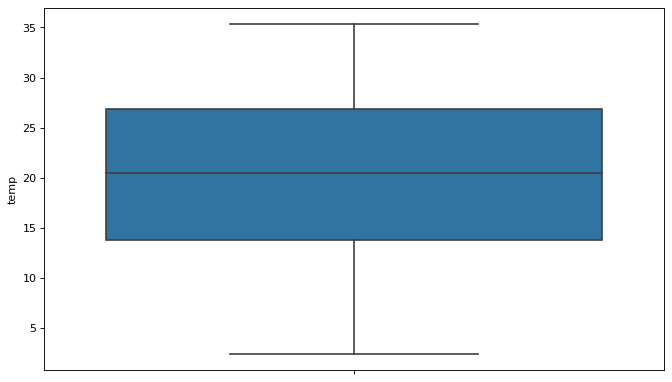

atemp


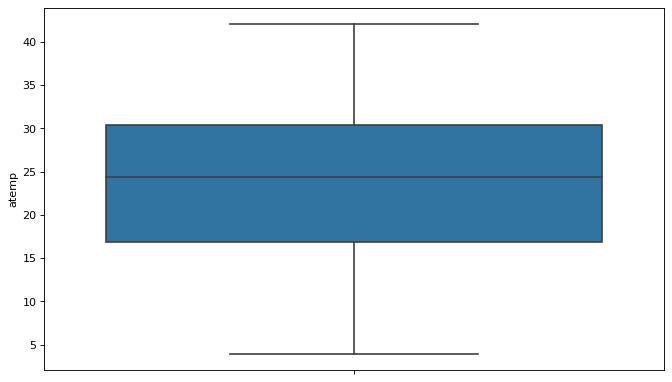

hum


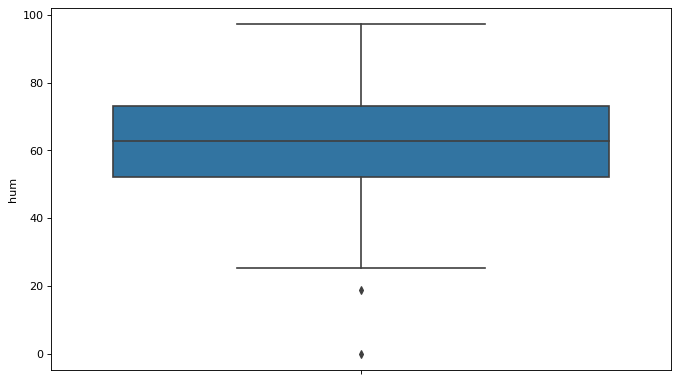

windspeed


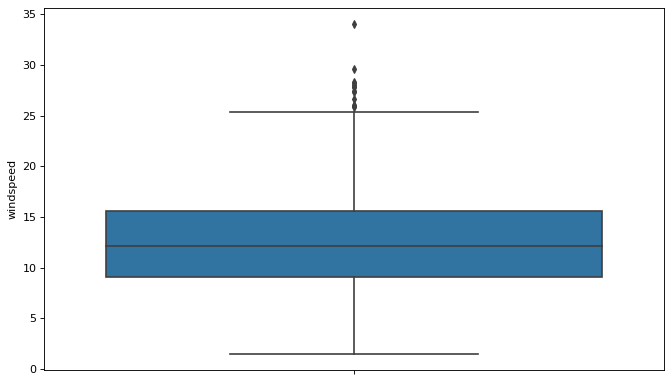

cnt


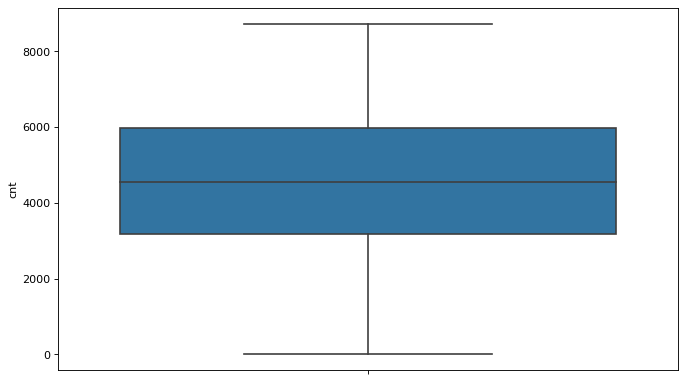

In [9]:
for col in continous_cols:
  figure(figsize=(10, 6), dpi=80)
  print(col)
  sns.boxplot(y=col, data=data)
  plt.show()
    

##Outlier handling

In [10]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3 - Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [11]:
for col in continous_cols:
  lowerbound,upperbound = outlier_treatment(data[col])
  print(col)
  percentage_oulier = (len(data[(data[col] > upperbound) | (data[col] < lowerbound)])/data.shape[0]) * 100
  print(percentage_oulier)

temp
0.0
atemp
0.0
hum
0.273972602739726
windspeed
1.7808219178082192
cnt
0.0


# EDA

<Figure size 1080x2160 with 0 Axes>

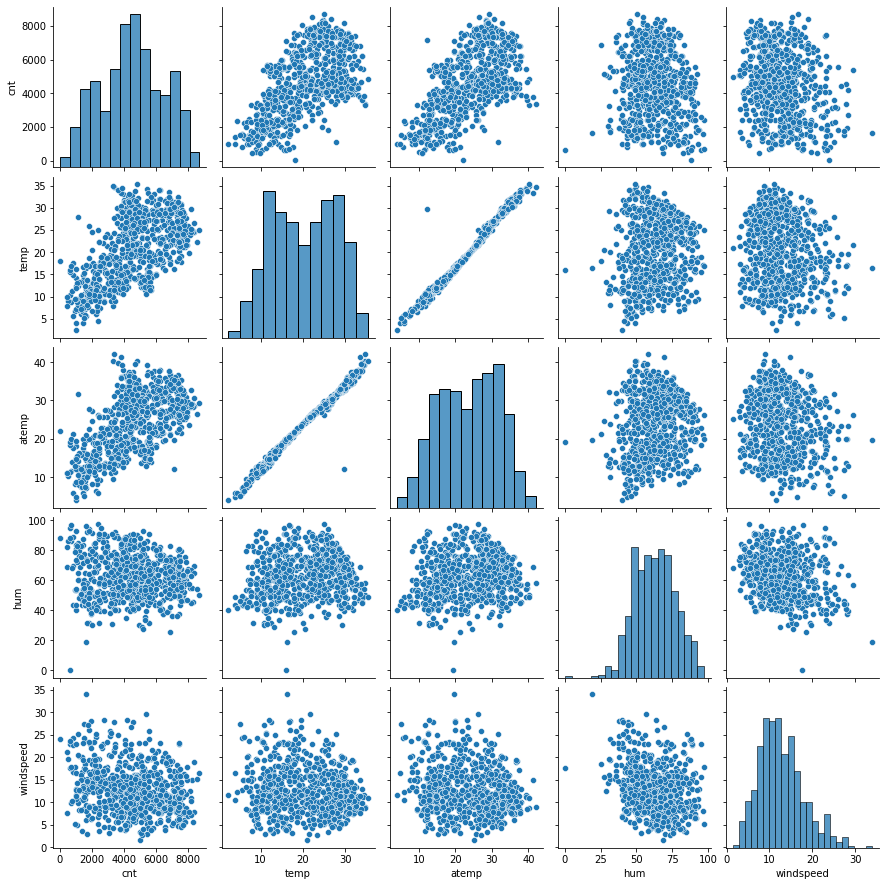

In [12]:
plt.figure(figsize = (15,30))
sns.pairplot(data=data,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

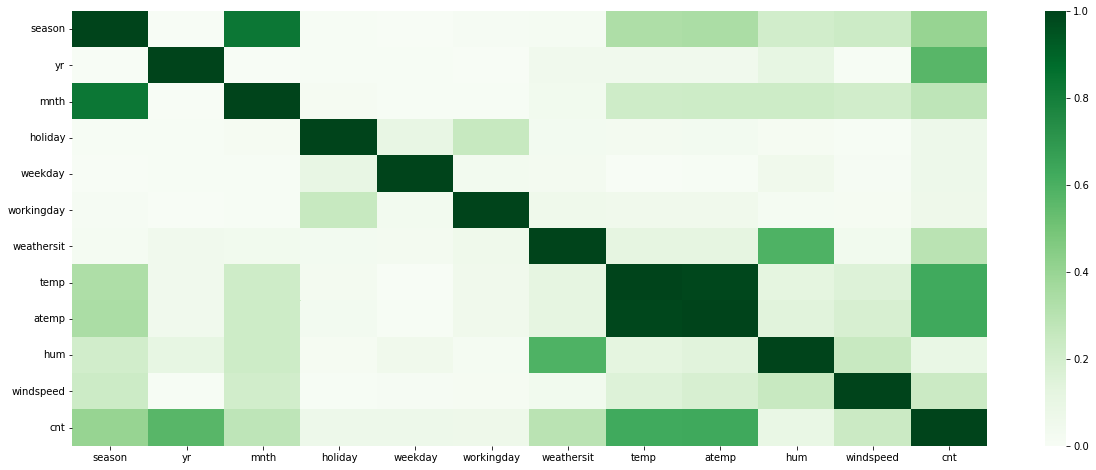

In [13]:
curr = data.corr().abs()
fig, ax = plt.subplots()
fig.set_size_inches(20.5, 8, forward=True)
ax = sns.heatmap(curr, cmap="Greens")
plt.show()

season


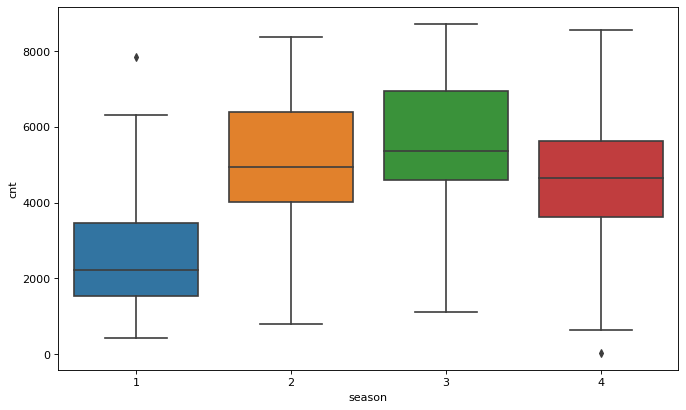

yr


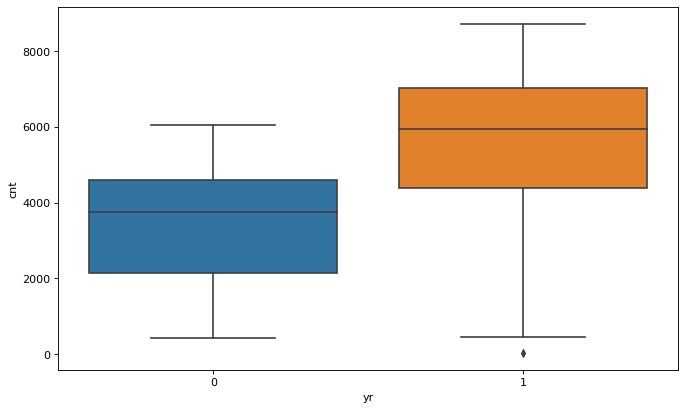

mnth


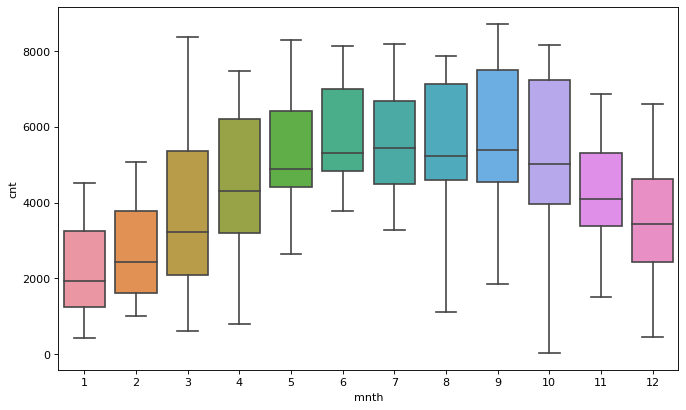

holiday


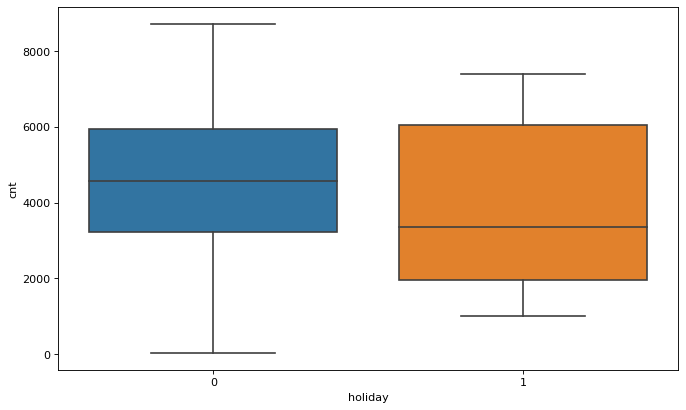

weekday


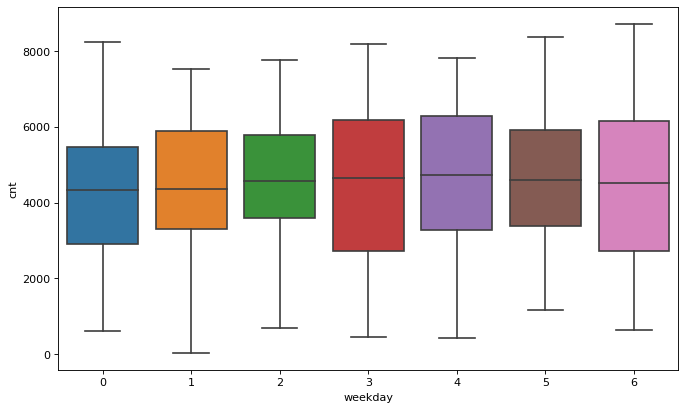

workingday


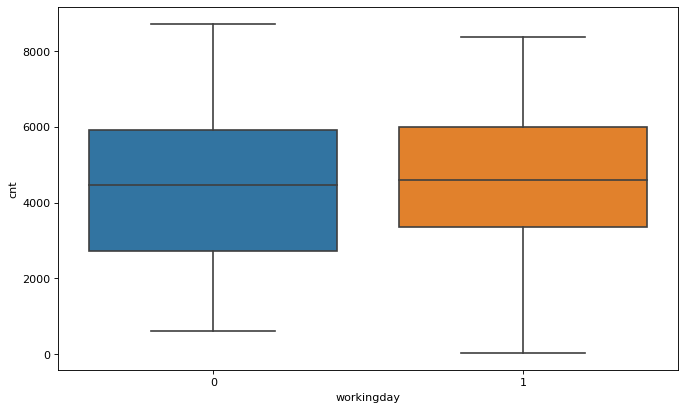

weathersit


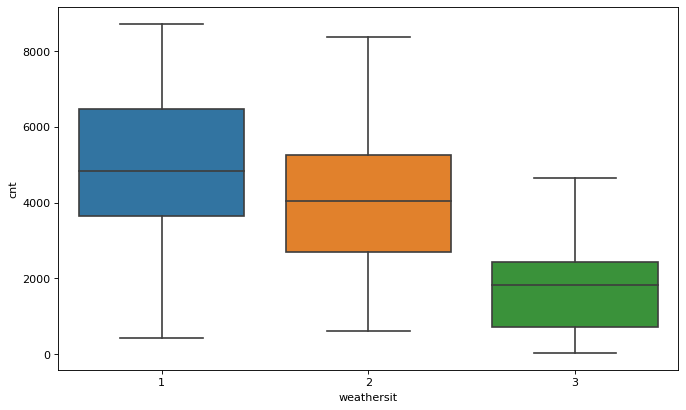

In [14]:
for col in categorical_cols:
  figure(figsize=(10, 6), dpi=80)
  print(col)
  sns.boxplot(x=col,y='cnt',data=data)
  plt.show()

In [16]:
one_hot_encoded_data = pd.get_dummies(data, columns = categorical_cols,drop_first=True)

In [17]:
one_hot_encoded_data.head()

,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,yr_1,mnth_2,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


In [18]:
one_hot_encoded_data.columns

Index(['temp', 'atemp', 'hum', 'windspeed', 'cnt', 'season_2', 'season_3',
       'season_4', 'yr_1', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6',
       'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12',
       'holiday_1', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'workingday_1', 'weathersit_2',
       'weathersit_3'],
      dtype='object')

In [19]:
np.random.seed(0)
df_train, df_test = train_test_split(one_hot_encoded_data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [20]:
df_train.head()


,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,yr_1,mnth_2,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
653,19.201653,23.0423,55.8333,12.208807,7534,0,0,1,1,0,...,0,0,1,0,0,0,0,1,0,0
576,29.246653,33.1448,70.4167,11.083475,7216,0,1,0,1,0,...,0,0,1,0,0,0,0,1,0,0
426,16.980847,20.6746,62.1250,10.792293,4066,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
728,10.489153,11.5850,48.3333,23.500518,1796,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
482,15.443347,18.8752,48.9583,8.708325,4220,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


# Scaling the data

In [21]:
df_train[continous_cols] = MinMaxScaler().fit_transform(df_train[continous_cols])

In [22]:
y_train = df_train.pop('cnt')
X_train = df_train

# Feature Selection

In [23]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [24]:
def create_model(cols):
    m = sm.add_constant(X_train[cols])
    m = sm.OLS(y_train, m).fit()
    print(m.summary())
    return m

In [25]:
def vifs(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    print(vif.sort_values(by='VIF',ascending=False))

In [26]:
X_train.columns[rfe.support_]

Index(['temp', 'hum', 'windspeed', 'season_2', 'season_3', 'season_4', 'yr_1',
       'mnth_8', 'mnth_9', 'mnth_10', 'holiday_1', 'weekday_6', 'workingday_1',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [27]:
# considering columns suggested by rfe
X_train = X_train[['temp', 'hum', 'windspeed', 'season_2', 'season_3', 'season_4', 'yr_1',
       'mnth_8', 'mnth_9', 'mnth_10', 'holiday_1', 'weekday_6', 'workingday_1',
       'weathersit_2', 'weathersit_3']]

In [28]:
X_train.shape


(510, 15)

In [29]:
def print_result(cols):
  create_model(cols)
  vifs(cols)

In [30]:
cols = ['temp', 'hum', 'windspeed', 'season_2', 'season_3', 'season_4', 'yr_1',
       'mnth_8', 'mnth_9', 'mnth_10', 'holiday_1', 'weekday_6', 'workingday_1',
       'weathersit_2', 'weathersit_3']

print_result(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.7
Date:                Mon, 21 Nov 2022   Prob (F-statistic):          1.89e-191
Time:                        08:07:32   Log-Likelihood:                 520.09
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1950      0.029      6.791   

In [31]:
# Dropping temp as it has high value of vif
new_cols = [ 'hum', 'windspeed', 'season_2', 'season_3', 'season_4', 'yr_1',
       'mnth_8', 'mnth_9', 'mnth_10', 'holiday_1', 'weekday_6', 'workingday_1',
       'weathersit_2', 'weathersit_3']
print_result(new_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     126.5
Date:                Mon, 21 Nov 2022   Prob (F-statistic):          2.34e-153
Time:                        08:07:34   Log-Likelihood:                 426.47
No. Observations:                 510   AIC:                            -822.9
Df Residuals:                     495   BIC:                            -759.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2647      0.034      7.786   

In [32]:
#dropping hum as it has vif > 2 which is high
new_cols =  ['windspeed', 'season_2', 'season_3', 'season_4', 'yr_1',
       'mnth_8', 'mnth_9', 'mnth_10', 'holiday_1', 'weekday_6', 'workingday_1',
       'weathersit_2', 'weathersit_3']
print_result(new_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     136.3
Date:                Mon, 21 Nov 2022   Prob (F-statistic):          2.59e-154
Time:                        08:07:34   Log-Likelihood:                 426.18
No. Observations:                 510   AIC:                            -824.4
Df Residuals:                     496   BIC:                            -765.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2437      0.019     12.627   

In [33]:
#dropping workingday_1 as it has vif > 2 which is high
new_cols =  ['windspeed', 'season_2', 'season_3', 'season_4', 'yr_1',
       'mnth_8', 'mnth_9', 'mnth_10', 'holiday_1', 'weekday_6',
       'weathersit_2', 'weathersit_3']
print_result(new_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     143.2
Date:                Mon, 21 Nov 2022   Prob (F-statistic):          1.17e-152
Time:                        08:07:37   Log-Likelihood:                 419.64
No. Observations:                 510   AIC:                            -813.3
Df Residuals:                     497   BIC:                            -758.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2835      0.016     17.750   

In [34]:
#dropping windspeed as it has vif > 2 which is high
new_cols =  ['season_2', 'season_3', 'season_4', 'yr_1',
       'mnth_8', 'mnth_9', 'mnth_10', 'holiday_1', 'weekday_6',
       'weathersit_2', 'weathersit_3']
print_result(new_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     143.2
Date:                Mon, 21 Nov 2022   Prob (F-statistic):          2.08e-146
Time:                        08:07:38   Log-Likelihood:                 402.20
No. Observations:                 510   AIC:                            -780.4
Df Residuals:                     498   BIC:                            -729.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2191      0.012     18.090   

In [35]:
#dropping season_3 as it has vif > 2 which is high
new_cols =  ['season_2', 'season_4', 'yr_1',
       'mnth_8', 'mnth_9', 'mnth_10', 'holiday_1', 'weekday_6',
       'weathersit_2', 'weathersit_3']
print_result(new_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     84.93
Date:                Mon, 21 Nov 2022   Prob (F-statistic):          5.22e-101
Time:                        08:07:41   Log-Likelihood:                 291.99
No. Observations:                 510   AIC:                            -562.0
Df Residuals:                     499   BIC:                            -515.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3200      0.013     24.727   

In [36]:
#dropping weekday_6 as it has high p value
new_cols =  ['season_2', 'season_4', 'yr_1',
       'mnth_8', 'mnth_9', 'mnth_10', 'holiday_1',
       'weathersit_2', 'weathersit_3']
print_result(new_cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     94.55
Date:                Mon, 21 Nov 2022   Prob (F-statistic):          5.34e-102
Time:                        08:07:43   Log-Likelihood:                 291.96
No. Observations:                 510   AIC:                            -563.9
Df Residuals:                     500   BIC:                            -521.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3206      0.013     25.429   

In [37]:
def create_sklearnmodel(X,y):
    lr = LinearRegression()
    lr.fit(X,y)
    return lr

lr = create_sklearnmodel(X_train[new_cols],y_train)
print(lr.intercept_,lr.coef_)

0.3206395319878306 [ 0.16502913  0.09378474  0.24929803  0.24338576  0.26652111  0.10928539
 -0.1272713  -0.11315605 -0.32617351]


In [38]:
y_train_pred = lr.predict(X_train[new_cols])

#Model evaluation

In [39]:
def plot_res_dist(act, pred):
    sns.distplot(act-pred)

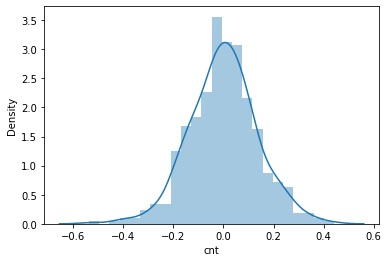

In [40]:
plot_res_dist(y_train, y_train_pred)

In [41]:
r2_score(y_train,y_train_pred)

0.6298801850983442